# SarcGraph Tutorial

SarcGraph incorporates functions to automatically detect and track z-discs and sarcomeres in movies of beating **human induced pluripotent stem cell-derived cardiomyocytes (hiPSC-CMs)**. In addition, SarcGraph includes the tools which enable the recovery of basic sarcomere characteristics and the ability to run further high level analysis.

In this notebook we provide a tutorial on how to use the SarcGraph package using demos and examples. The focus if on the ``SarcGraph`` class in the ``sarcgraph.sg`` module.

## Analyzie a Sample Video

In this section we show how to use ``SarcGraph`` to detect and track zdiscs and sarcomeres in a sample movie of beating hiPSC-CM. 

To showcase this we use ``samples/sample_0.avi``.

### Import Modules

The first step is to import ``SarcGraph`` class from ``sarcgraph.sg`` module:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sarcgraph.sg import SarcGraph

### SarcGraph Initialization

Next we need to create an instance of ``SarcGraph`` class:

``SarcGraph`` class takes two optional inputs:
- ``output_dir``: the directory to save the results - default: ``'test-run'``
- ``file_type``: whether the sample is a video or an image - default: ``'video'``

In [3]:
sg = SarcGraph(output_dir='../tutorial-results', file_type='video')

### Run Detection

The simplest way to perform sarcomere detection on the video sample is to run ``SarcGraph().sarcomere_detection`` function:

In [4]:
sarcomeres, _ = sg.sarcomere_detection(file_path='../samples/sample_0.avi')

Frame 79: 81 trajectories present.


``SarcGraph().sarcomere_detection`` automatically runs in three steps:

1) Z-disc segmentation: load the video, filter frames, and detect zdiscs
2) Z-disc tracking: track detected z-discs
3) Sarcomere detection: detect sarcomeres using tracked z-discs information

And, this is how the output looks like:

In [5]:
sarcomeres.sample(5)

,frame,sarc_id,x,y,length,width,angle,zdiscs
4189,29,52,79.761497,278.172031,12.438153,14.483509,3.137861,"48,52"
2195,35,27,289.156301,108.848200,19.616138,13.464436,2.154955,"21,25"
292,52,3,67.584391,101.608677,21.399766,13.509391,0.932972,"0,55"
2384,64,29,274.115273,168.586229,11.462784,13.108982,2.722793,"24,28"
3826,66,47,116.149181,263.710361,11.220564,14.050677,0.000293,"44,60"


By dafault ``save_output=True`` in ``sg.sarcomere_detection()`` and the following information will be saved in ``sg.output_dir``:

- raw video frames (grayscale)
- filtered video frames
- zdisc contours
- segmented zdiscs information
- tracked zdiscs information
- detected sarcomeres information

### Simple Visualization

We briefly show how to use the saved information to visualize zdiscs and sarcomeres in one frame of the video.

In [6]:
# load the information
raw_frame = np.load(f"{sg.output_dir}/raw-frames.npy")[0, :, :, 0]
tracked_zdiscs = pd.read_csv(f"{sg.output_dir}/tracked-zdiscs.csv", index_col=[0])

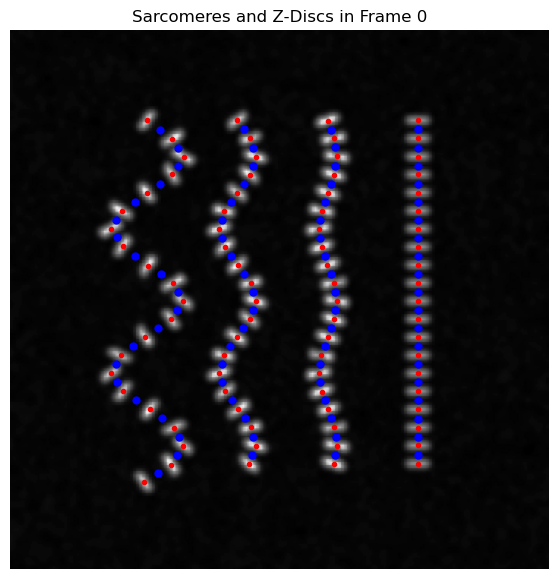

In [8]:
sarcs_frame = sarcomeres[sarcomeres.frame == 0]
zdiscs_frame = tracked_zdiscs[tracked_zdiscs.frame == 0]

plt.figure(figsize=(7,7))
plt.axes().set_title('Sarcomeres and Z-Discs in Frame 0')
plt.axis('off')
plt.imshow(raw_frame, cmap='gray')
plt.plot(zdiscs_frame.y, zdiscs_frame.x, 'r.')
plt.plot(sarcs_frame.y, sarcs_frame.x, 'b.', ms=10)

### Alternative Way to Run SarcGraph

As mentioned in section [Run Detection](###-Run-Detection), ``sg.sarcomere_detection`` performs three tasks consecutively. Each task can also be run separately. We show how this can be down below:

**Note**

We set ``save_output=False`` which means results will not be saves.

#### Z-disc Segmentation

Run ``sg.zdisc_segmentation()``.

- Input could be either ``file_path`` or ``raw_frames``.

**Notes**

- ``raw_frames`` must be a 4d numpy array with ``shape=(frames, dim 1, dim 2, channels)``, for example, for a grayscale video with 20 frames and resolution of 400x400 the shape of ``raw_frames`` is ``(20, 400, 400, 1)``
- SarcGraph uses ``scikit`` library to load video/image files and can handle most formats. Yet, we recommend loading your sample video/image into a numpy array and pass the array as the input to ``SarcGraph`` functions, especially if the video/image is saved as a ``TIFF`` file.

In [11]:
zdiscs = sg.zdisc_segmentation(file_path='../samples/sample_0.avi', save_output=False)

#### Z-disc tracking

Run ``sg.zdisc_tracking()``.

- If the input is either ``file_path`` or ``raw_frames``, this function runs ``sg.zdisc_tracking`` first and then applies tracking.
- If the input is ``segmented_zdiscs``, ``sg.zdisc_tracking`` only runs tracking.

In [12]:
tracked_zdiscs = sg.zdisc_tracking(segmented_zdiscs=zdiscs, save_output=False)

Frame 79: 81 trajectories present.


Let's check the information stored in tracked_zdiscs:

In [14]:
tracked_zdiscs.sample(10)

,frame,x,y,p1_x,p1_y,p2_x,p2_y,particle,freq
2448,30,197.068847,109.547419,192.000000,104.849861,201.304907,114.000000,15,80
38,38,280.274165,264.644380,280.000000,258.741695,280.000000,270.553816,-1,80
737,9,207.089638,270.112867,207.000000,262.590614,207.000000,277.040139,9,80
1067,13,195.411618,166.418353,192.117303,161.000000,199.000000,171.950748,14,80
491,6,220.853997,77.377551,217.000000,71.581554,224.000000,83.523844,7,80
1334,16,236.789017,263.706117,237.000000,256.671810,237.000000,270.605093,20,80
5556,68,152.646118,151.463935,156.000000,145.712621,149.000000,157.448439,80,80
4631,57,208.315309,274.129889,209.000000,267.186959,207.000000,280.691613,9,80
762,9,263.422446,118.238413,267.000000,112.517999,260.000000,124.630881,33,80
3039,37,238.012287,266.121546,238.000000,258.308901,238.000000,273.012823,20,80


#### Sarcomere Detection Step

Run ``sg.sarcomere_detection()``.

- If the input is either ``file_path`` or ``raw_frames``, this function runs ``sg.zdisc_tracking`` then ``sg.zdisc_tracking`` before applying sarcomere detection.
- If the input is ``segmented_zdiscs``, this function runs ``sg.zdisc_tracking`` first and then sarcomere detection.
- If the input is ``tracked_zdiscs``, this function only runs sarcomere detection.

In [15]:
sarcs, _ = sg.sarcomere_detection(tracked_zdiscs=tracked_zdiscs)

## Analyzie a Sample Image

To analyze a single frame we can follow the steps with a few changes:

- When we are working on single-frame images and not videos, the tracking part cannot be done! Therefore, during [SarcGraph Initialization](###-SarcGraph-Initialization) we should set ``file_type="image"``.
- If rather than running ``SarcGraph().sarcomere_detection``, we need to process the image step by step, we should still run ``SarcGraph().zdiscs_tracking`` although it does not do much.

Import ``SarcGraph`` class first:

In [ ]:
from sarcgraph.sg import SarcGraph

Create a new instance of ``SarcGraph`` class and set ``file_type='image'``

In [17]:
sg_img = SarcGraph(output_dir='../tutorial-results-image', file_type='image')

Let's load a sample image to a numpy array and pass it to ``sg_img.sarcomere_detection()`` rather than specifying ``file_path``:

In [19]:
import matplotlib as mpl

img = mpl.image.imread('../samples/sample_5.png')

**Note**

We used ``matplotlib.image`` to load the image here.

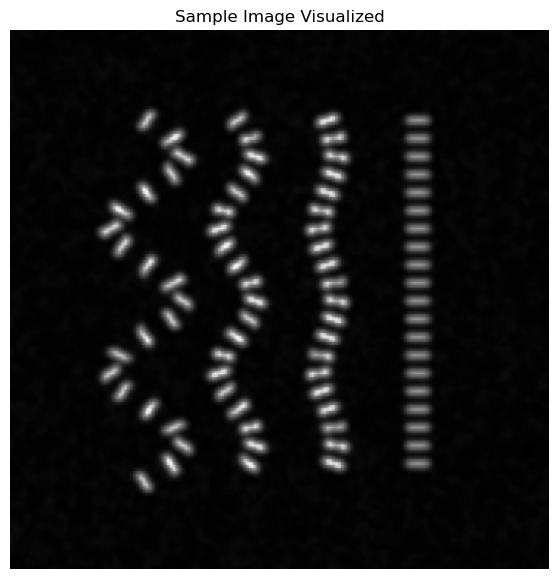

In [21]:
plt.figure(figsize=(7,7)) 
plt.axes().set_title('Sample Image Visualized')
plt.axis('off')
plt.imshow(img, cmap='gray')

Our sample image has the shape ``(368, 368)`` which needs to be reshaped to ``(1, 368, 368, 1)`` - ``[frames, dimension 1, dimension 2, color channels]``.

In [23]:
img = img[None, :, :, None]

Now we can run ``sg_img.sarcomere_detection()``:

In [24]:
sarcs_img, _ = sg_img.sarcomere_detection(raw_frames=img)